<a href="https://colab.research.google.com/github/shashi3876/cmab-practice/blob/main/Multi_Armed_Bandits_Outline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np

class NormalBandit:
    def __init__(self, means, stds):
        self.means = means
        self.stds = stds
        self.best_mean = max(means)

    def pull(self, arm):
        return np.random.normal(self.means[arm], self.stds[arm])

    def regret(self, reward):
        return self.best_mean - reward


In [ ]:
def run_epsilon_greedy(bandit, n_rounds, epsilon=0.1):
    n_arms = len(bandit.means)
    counts = np.zeros(n_arms)
    values = np.zeros(n_arms)
    regrets = []

    for t in range(n_rounds):
        if np.random.rand() < epsilon:
            arm = np.random.randint(n_arms)
        else:
            arm = np.argmax(values)

        reward = bandit.pull(arm)
        counts[arm] += 1
        values[arm] += (reward - values[arm]) / counts[arm]
        regrets.append(bandit.regret(reward))

    return np.cumsum(regrets)


In [ ]:
def run_thompson_sampling(bandit, n_rounds):
    n_arms = len(bandit.means)
    rewards_sum = np.zeros(n_arms)
    rewards_sq_sum = np.zeros(n_arms)
    counts = np.zeros(n_arms)
    regrets = []

    for t in range(n_rounds):
        samples = []
        for arm in range(n_arms):
            mean = rewards_sum[arm] / counts[arm] if counts[arm] > 0 else 0
            std = np.sqrt((rewards_sq_sum[arm] / counts[arm] - mean**2)) if counts[arm] > 0 else 1
            sample = np.random.normal(mean, std)
            samples.append(sample)

        arm = np.argmax(samples)
        reward = bandit.pull(arm)
        counts[arm] += 1
        rewards_sum[arm] += reward
        rewards_sq_sum[arm] += reward ** 2
        regrets.append(bandit.regret(reward))

    return np.cumsum(regrets)


In [ ]:
def run_ucb(bandit, n_rounds, c=2):
    n_arms = len(bandit.means)
    counts = np.zeros(n_arms)
    values = np.zeros(n_arms)
    regrets = []

    for t in range(n_rounds):
        if t < n_arms:
            arm = t  # Play each arm once
        else:
            confidence_bounds = values + c * np.sqrt(np.log(t + 1) / (counts + 1e-6))
            arm = np.argmax(confidence_bounds)

        reward = bandit.pull(arm)
        counts[arm] += 1
        values[arm] += (reward - values[arm]) / counts[arm]
        regrets.append(bandit.regret(reward))

    return np.cumsum(regrets)


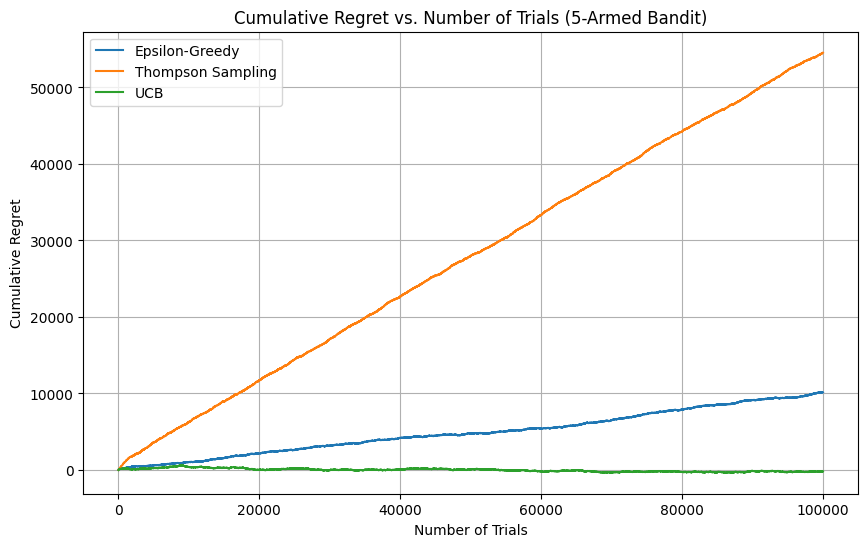

In [ ]:
import matplotlib.pyplot as plt

# Define bandit setup
means = [3, 3.5, 4, 4.5, 5]
stds = [3, 2, 2, 3, 2]
bandit = NormalBandit(means, stds)
n_rounds = 100000

# Run simulations
regret_eps = run_epsilon_greedy(bandit, n_rounds, epsilon=0.1)
regret_thompson = run_thompson_sampling(bandit, n_rounds)
regret_ucb = run_ucb(bandit, n_rounds)

# Plot cumulative regret
plt.figure(figsize=(10, 6))
plt.plot(regret_eps, label="Epsilon-Greedy")
plt.plot(regret_thompson, label="Thompson Sampling")
plt.plot(regret_ucb, label="UCB")
plt.xlabel("Number of Trials")
plt.ylabel("Cumulative Regret")
plt.title("Cumulative Regret vs. Number of Trials (5-Armed Bandit)")
plt.legend()
plt.grid(True)
plt.show()


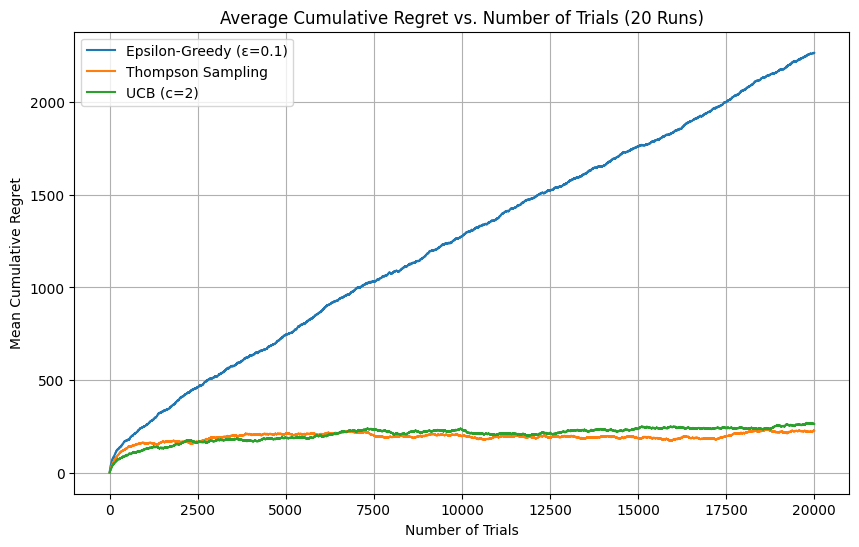

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Bandit Environment
class NormalBandit:
    def __init__(self, means, stds):
        self.means = means
        self.stds = stds
        self.best_mean = max(means)

    def pull(self, arm):
        return np.random.normal(self.means[arm], self.stds[arm])

    def regret(self, reward):
        return self.best_mean - reward

# Epsilon-Greedy
def run_epsilon_greedy(bandit, n_rounds, epsilon=0.1):
    n_arms = len(bandit.means)
    counts = np.zeros(n_arms)
    values = np.zeros(n_arms)
    regrets = []

    for t in range(n_rounds):
        if np.random.rand() < epsilon:
            arm = np.random.randint(n_arms)
        else:
            arm = np.argmax(values)
        reward = bandit.pull(arm)
        counts[arm] += 1
        values[arm] += (reward - values[arm]) / counts[arm]
        regrets.append(bandit.regret(reward))
    return np.cumsum(regrets)

# Thompson Sampling
def run_thompson_sampling(bandit, n_rounds):
    n_arms = len(bandit.means)
    counts = np.zeros(n_arms)
    sum_rewards = np.zeros(n_arms)
    regrets = []

    for t in range(n_rounds):
        samples = []
        for arm in range(n_arms):
            n = counts[arm]
            if n == 0:
                samples.append(np.random.normal(0, 10))  # Higher variance for initial exploration
            else:
                mean = sum_rewards[arm] / n
                std = bandit.stds[arm] / np.sqrt(n)  # Use actual arm std
                samples.append(np.random.normal(mean, std))
        arm = np.argmax(samples)
        reward = bandit.pull(arm)
        counts[arm] += 1
        sum_rewards[arm] += reward
        regrets.append(bandit.regret(reward))

    return np.cumsum(regrets)

# UCB
def run_ucb(bandit, n_rounds, c=2):
    n_arms = len(bandit.means)
    counts = np.zeros(n_arms)
    values = np.zeros(n_arms)
    regrets = []

    for t in range(n_rounds):
        if t < n_arms:
            arm = t
        else:
            confidence_bounds = values + c * np.sqrt(np.log(t + 1) / (counts + 1e-6))
            arm = np.argmax(confidence_bounds)

        reward = bandit.pull(arm)
        counts[arm] += 1
        values[arm] += (reward - values[arm]) / counts[arm]
        regrets.append(bandit.regret(reward))
    return np.cumsum(regrets)

# Run multiple simulations
def run_multiple_experiments(strategy_fn, n_trials=1000, n_runs=20):
    all_regrets = []
    for _ in range(n_runs):
        bandit = NormalBandit(means=[3, 3.5, 4, 4.5, 5], stds=[3, 2, 2, 2, 3])
        regrets = strategy_fn(bandit, n_trials)
        all_regrets.append(regrets)
    return np.mean(all_regrets, axis=0)

# Simulate all strategies
n_rounds = 20000
n_runs = 50
mean_regret_eps = run_multiple_experiments(
    lambda bandit, n_trials: run_epsilon_greedy(bandit, n_trials, epsilon=0.1),
    n_rounds, n_runs
)

mean_regret_ts = run_multiple_experiments(
    run_thompson_sampling,
    n_rounds, n_runs
)

mean_regret_ucb = run_multiple_experiments(
    run_ucb,
    n_rounds, n_runs
)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(mean_regret_eps, label="Epsilon-Greedy (ε=0.1)")
plt.plot(mean_regret_ts, label="Thompson Sampling")
plt.plot(mean_regret_ucb, label="UCB (c=2)")
plt.xlabel("Number of Trials")
plt.ylabel("Mean Cumulative Regret")
plt.title("Average Cumulative Regret vs. Number of Trials (20 Runs)")
plt.legend()
plt.grid(True)
plt.show()
